Python implementation of Bagging

In [1]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X= dataset.data
Y = dataset.target

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=3)

In [4]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [5]:
knn.score(X_train,y_train)

0.9422110552763819

In [6]:
knn.score(X_test,y_test)

0.9239766081871345

##### applying Bagging method

let's using bagging over our KNN classifier and see if our score improves:

In [7]:
bgg_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=10,
                           max_samples=0.5,bootstrap=True,random_state=3,oob_score=True)

In [8]:
#Let's check the out of bag score 
bgg_knn.oob_score

True

In [9]:
bgg_knn.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.5, n_estimators=10, n_jobs=None, oob_score=True,
                  random_state=3, verbose=0, warm_start=False)

In [10]:
bgg_knn.score(X_test,y_test)

0.9415204678362573

##### applying pasting method

Great! our score sginificantly improves with use of bagging.

let's not use bootstrap and see the model accuracy! Remember this is "Pasting"

In [11]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                               n_estimators=10,max_samples=0.5,
                               bootstrap=False,random_state=3)

In [12]:
pasting_knn.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=3, verbose=0, warm_start=False)

In [13]:
pasting_knn.score(X_test,y_test)

0.9473684210526315

##### Let's see the python implementation of Random forest.

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\arjun\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [8]:
data = pd.read_csv(r'C:\Users\arjun\Desktop\Temp_files\winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.shape

(1599, 12)

In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
X= data.drop('quality',axis=1)
y=data[['quality']]

In [12]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=355)

#### Decision tree

In [13]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier(min_samples_split=2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
# accuracy of our classification tree
clf.score(X_test,y_test)

0.6208333333333333

In [15]:
#let's first visualize the tree on the data without doing any pre processing
clf2=DecisionTreeClassifier(criterion='entropy',max_depth=24,min_samples_leaf=1)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=24, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
clf2.score(X_test,y_test)

0.6270833333333333

# checking feature importance

In [20]:
importance=clf2.feature_importances_
importance

array([0.05753273, 0.11597214, 0.10443327, 0.06477999, 0.07137653,
       0.06301952, 0.10968606, 0.06664719, 0.0616948 , 0.10439853,
       0.18045924])

Feature: 0, Score: 0.05753
Feature: 1, Score: 0.11597
Feature: 2, Score: 0.10443
Feature: 3, Score: 0.06478
Feature: 4, Score: 0.07138
Feature: 5, Score: 0.06302
Feature: 6, Score: 0.10969
Feature: 7, Score: 0.06665
Feature: 8, Score: 0.06169
Feature: 9, Score: 0.10440
Feature: 10, Score: 0.18046


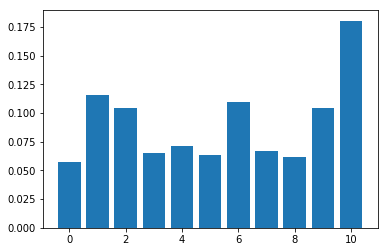

In [30]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
import matplotlib.pyplot as plt
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()    

##### Random Forest Classifier

In [24]:
rand_clf3=RandomForestClassifier(random_state=6)

Random state, if given none then score will vary everytime you run the RandomForestClassifier. If we asssign a value to it, then result will remain constant.

In [25]:
rand_clf3.fit(X_train,y_train)

C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [26]:
rand_clf3.score(X_test,y_test)

0.6708333333333333

In [33]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param={"n_estimators" : [90,100,120,130],
            "criterion" : ['gini','entropy'],
            'max_depth' : range(2,10,1)
}

In [34]:
grid_search = GridSearchCV(estimator=rand_clf3,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)
grid_search

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=6,
                                   

In [35]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   59.6s finished
C:\Users\arjun\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=6,
                                   

In [36]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 130}

In [39]:
rand_clf4=RandomForestClassifier(criterion= 'entropy',max_depth= 9,n_estimators = 130)
rand_clf4.fit(X_train,y_train)

C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
rand_clf4.score(X_test,y_test)

0.6458333333333334

In [ ]:
#again tuninning the parameter

In [41]:
grid_param_1={"n_estimators" : [130,140,150,160],
            "criterion" : ['gini','entropy'],
              'max_depth' : range(9,20,1)
}

In [42]:
grid_search_1  = GridSearchCV(estimator=rand_clf4,param_grid=grid_param_1,cv=5,n_jobs=-1,verbose=3)
grid_search_1.fit(X_train,y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:  2.1min finished
C:\Users\arjun\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy', max_depth=9,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=130, n_jobs=None,
                                              oob_score=False,
                                              rando

In [43]:
grid_search_1.fit(X_train,y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:  2.2min finished
C:\Users\arjun\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy', max_depth=9,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=130, n_jobs=None,
                                              oob_score=False,
                                              rando

In [44]:
grid_search_1.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 150}

In [46]:
rand_clf4=RandomForestClassifier(criterion = 'entropy', max_depth= 12, n_estimators = 150)
rand_clf4.fit(X_train,y_train)

C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
rand_clf4.score(X_test,y_test)

0.6729166666666667

In [49]:
#Saving file
import pickle

with open(r'C:\Users\arjun\Machine Learning\Ensemble'+ '/RFmodelForPrediction.sav','wb') as f:
    pickle.dump(rand_clf4,f)

In [65]:
#rand_clf4.predict(X_test)

In [62]:
k=[[8.5,0.28,0.56,1.8,0.092,35,103,0.9969,3.3,0.75,10.5]]

In [63]:
rand_clf4.predict(k)

array([7], dtype=int64)

In [64]:
i=[[7.7,0.935,0.43,2.2,0.114,22,114,0.997,3.25,0.73,9.2]]
rand_clf4.predict(i)

array([5], dtype=int64)

# Stacking (Stacked Generalization)

In [67]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [69]:
data= pd.read_csv(r'C:\Users\arjun\Desktop\Temp_files\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [70]:
X = data.drop('Outcome',axis=1)
y = data[['Outcome']]

In [71]:
# let's divide our dataset into training set and hold out set by 50%
train,val_train,test,val_test = train_test_split(X,y,test_size=0.5,random_state=355)

In [93]:
print(val_test.shape)
val_test.head()

(384, 1)


,Outcome
616,0
727,0
93,1
503,0
596,0


In [73]:
# let's split the training set again into training and test dataset 
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2,random_state=355)

We will use KNN and SVM algorithm as our base models.

Let's fit both of the models first on the x_train and y_train data.

In [74]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [75]:
knn.score(x_test,y_test)

0.7402597402597403

In [76]:
svm=SVC()
svm.fit(x_train,y_train)

C:\Users\arjun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [79]:
svm.score(x_test,y_test)

0.7402597402597403

#### Let's get the predictions of all the base models on the validation set val_train.

In [80]:
prediction_val1=knn.predict(val_train)
prediction_val2=svm.predict(val_train)

Let's stack the prediciton values for validation set together as "predict_val"

In [85]:
prediction_val = np.column_stack((prediction_val1,prediction_val2))
prediction_val

array([[0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1,

##### Let's get the prediction for all the base models on the test set x_test

In [90]:
prediction_test1 = knn.predict(x_test)
prediction_test2= svm.predict(x_test)

Let's stack the prediciton values for validation set together as "predict_test"

In [88]:
prediction_test=np.column_stack((prediction_test1,prediction_test2))
prediction_test

array([[1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1,

##### Let's use the Use the stacked data "predict_val" and "val_test" as the input feature for meta_model i.e. randomforest classifier

In [94]:
print(prediction_val.shape)
print(val_test.shape)

(384, 2)
(384, 1)


In [91]:
rand_clf=RandomForestClassifier()
rand_clf.fit(prediction_val,val_test)

C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Let's check the accuracy of our meta_model using predict_test and y_test.

In [95]:
rand_clf.score(prediction_test,y_test)

0.7402597402597403

In [96]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5]
}

In [97]:
grid_search=GridSearchCV(estimator=rand_clf,param_grid=grid_param,n_jobs=-1,cv=5, verbose=3)

In [98]:
grid_search.fit(prediction_val,val_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   20.7s finished
C:\Users\arjun\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [99]:
grid_search.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 90}

In [100]:
rand_clf1=RandomForestClassifier(criterion = 'gini', min_samples_leaf = 1, n_estimators = 90)

In [102]:
rand_clf1.fit(prediction_val,val_test)

C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
rand_clf1.score(prediction_test,y_test)

0.7402597402597403